<a href="https://colab.research.google.com/github/gilvardperez/Ciencia-de-datos/blob/main/An%C3%A1lisis%20de%20componentes%20principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de componentes Principales PCA**:

Artículo realizado por Gilvard Pérez

[LinkedIn](https://www.linkedin.com/in/gilvardperez)

El Análisis de Componentes Principales (PCA) es una técnica fundamental en el campo de la ciencia de datos que se utiliza principalmente para reducir la dimensionalidad de conjuntos de datos complejos mientras se conserva la mayor cantidad posible de información.

Muchas veces, los conjuntos de datos en ciencia de datos contienen un gran número de características o variables. PCA ayuda a reducir estas dimensiones al transformar los datos originales en un conjunto de nuevas variables, llamadas componentes principales, que explican la mayor variabilidad en los datos.
Al agrupar información relacionada en las nuevas componentes principales, PCA puede eliminar la redundancia que a menudo está presente en los datos originales, lo que puede mejorar la eficiencia computacional y reducir el riesgo de sobreajuste en modelos de aprendizaje automático.

In [102]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [103]:
# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

Imprimimos el set de datos con los nombres de columna

In [104]:
#Viendo el dataset
df_original = pd.DataFrame(data=X, columns=feature_names)
print("Conjunto de datos original:")
print(df_original)

Conjunto de datos original:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [105]:
# Normalizando los datos  --- Los datos deben ser estandarizados siempre que se realiza PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ya que desconocemos la cantidad de componentes principales probaremos con 4 y veremos cuanta varianza son capaces de explicar.

In [106]:
# Aplicar PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [107]:
# Viendo un dataframe
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df['target'] = y

Podemos visualizar cuanto aporta cada observación a cada componente principal

In [108]:
#Viendo dataframe
df

,PC1,PC2,PC3,PC4,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,2
146,1.564580,-0.896687,-0.026371,-0.220192,2
147,1.521170,0.269069,0.180178,-0.119171,2
148,1.372788,1.011254,0.933395,-0.026129,2


In [109]:
# Mostrar la composición de cada componente principal
print("Composición de cada componente principal:")
for i, component in enumerate(pca.components_):
    print(f"Componente Principal {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {component[j]:.3f}")
    print()


Composición de cada componente principal:
Componente Principal 1:
sepal length (cm): 0.521
sepal width (cm): -0.269
petal length (cm): 0.580
petal width (cm): 0.565

Componente Principal 2:
sepal length (cm): 0.377
sepal width (cm): 0.923
petal length (cm): 0.024
petal width (cm): 0.067

Componente Principal 3:
sepal length (cm): -0.720
sepal width (cm): 0.244
petal length (cm): 0.142
petal width (cm): 0.634

Componente Principal 4:
sepal length (cm): -0.261
sepal width (cm): 0.124
petal length (cm): 0.801
petal width (cm): -0.524



representa la composición de cada componente principal en términos de las características originales del conjunto de datos. Cada componente principal es una combinación lineal de las características originales, donde los números indican los pesos de cada característica en la formación del componente principal. Aquí hay una explicación de los valores proporcionados:

    Componente Principal 1:
        Este componente principal está fuertemente influenciado por las características de petal length y petal width, con pesos positivos relativamente altos (0.580 y 0.565 respectivamente). Esto sugiere que las flores con valores más altos en estas características tendrán valores más altos en el Componente Principal 1.
        sepal length también contribuye positivamente, aunque en menor medida (0.521).
        sepal width tiene un peso negativo (-0.269), lo que significa que las flores con valores más bajos en esta característica tendrán valores más altos en el Componente Principal 1.

    Componente Principal 2:
        sepal width tiene el peso más alto y positivo en este componente principal (0.923), lo que indica que las flores con valores más altos en esta característica tendrán valores más altos en el Componente Principal 2.
        sepal length también contribuye positivamente, aunque en menor medida (0.377).
        petal length y petal width tienen pesos bajos y positivos (0.024 y 0.067 respectivamente), lo que sugiere una influencia menor en este componente principal.

    Componente Principal 3:
        sepal length tiene un peso negativo y relativamente alto en este componente principal (-0.720), lo que sugiere una relación inversa con las flores con valores más bajos en esta característica que tendrán valores más altos en el Componente Principal 3.
        petal width tiene el peso más alto y positivo (0.634), seguido de sepal width con un peso positivo (0.244). petal length también contribuye positivamente, aunque en menor medida (0.142).

    Componente Principal 4:
        petal length tiene el peso más alto y positivo en este componente principal (0.801), lo que indica que las flores con valores más altos en esta característica tendrán valores más altos en el Componente Principal 4.
        sepal width contribuye positivamente pero en menor medida (0.124).
        petal width tiene un peso negativo relativamente alto (-0.524), sugiriendo una relación inversa con las flores con valores más bajos en esta característica que tendrán valores más altos en el Componente Principal 4.

También podemos validar de manera gráfica como se estructura las componentes principales para que sea mas intuitiva su composición.

<Figure size 1200x800 with 0 Axes>

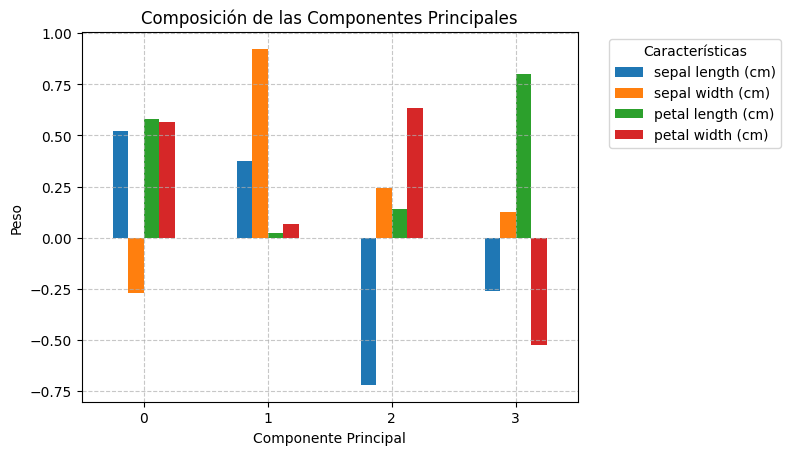

In [110]:
component_df = pd.DataFrame(pca.components_, columns=feature_names)
plt.figure(figsize=(12, 8))
ax = component_df.plot(kind='bar')
plt.title('Composición de las Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Peso')
plt.xticks(rotation=0)
plt.legend(title='Características', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Visualizando los componentes

In [111]:
component_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


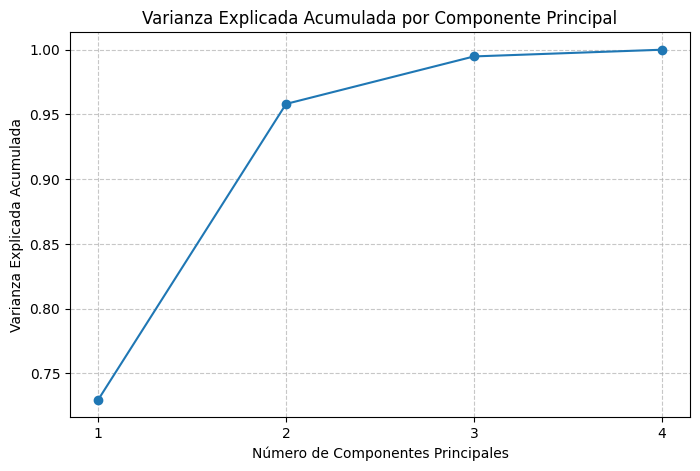

In [112]:
# Mostrar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 5))
plt.show()

Ahora hemos validado que 2 componentes principales tienen la habilidad de explicar cerca del 96% de la varianza y con 3 tenemos un valor cercano al 100% lo que significa que podemos reducir la dimensionalidad a 3 columnas con PCA:

#3 componentes

In [113]:
# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [114]:
# Crear DataFrame para visualizar los resultados
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df['target'] = y

In [115]:
# Mostrar la composición de cada componente principal
print("Composición de cada componente principal:")
for i, component in enumerate(pca.components_):
    print(f"Componente Principal {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {component[j]:.3f}")
    print()

Composición de cada componente principal:
Componente Principal 1:
sepal length (cm): 0.521
sepal width (cm): -0.269
petal length (cm): 0.580
petal width (cm): 0.565

Componente Principal 2:
sepal length (cm): 0.377
sepal width (cm): 0.923
petal length (cm): 0.024
petal width (cm): 0.067

Componente Principal 3:
sepal length (cm): -0.720
sepal width (cm): 0.244
petal length (cm): 0.142
petal width (cm): 0.634



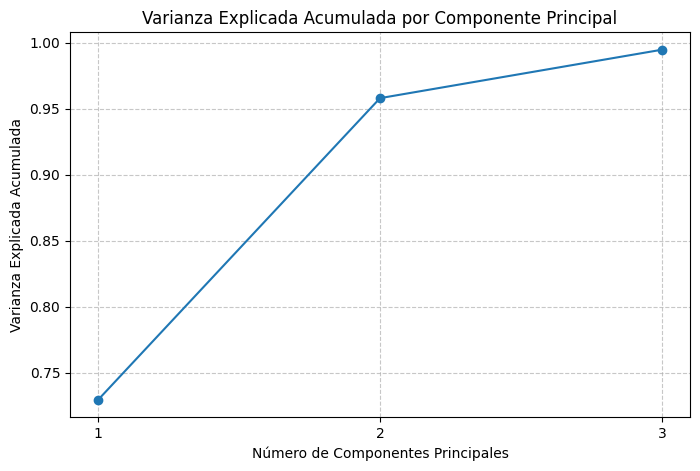

In [116]:
# Mostrar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 4), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 4))
plt.show()

<Figure size 1200x800 with 0 Axes>

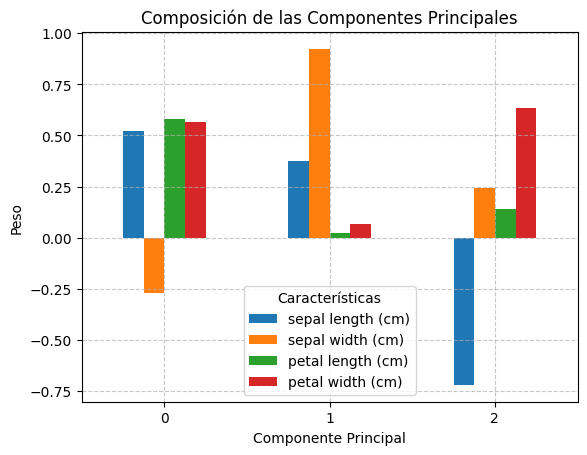

In [117]:
# Crear un DataFrame para almacenar la composición de las componentes principales
component_df = pd.DataFrame(pca.components_, columns=feature_names)

# Graficar las componentes principales
plt.figure(figsize=(12, 8))
component_df.plot(kind='bar')
plt.title('Composición de las Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Peso')
plt.xticks(rotation=0)
plt.legend(title='Características')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#Graficando los grupos

Podemos observar como los grupos se separan bajo las 3 componentes principales y tienen características diferenes

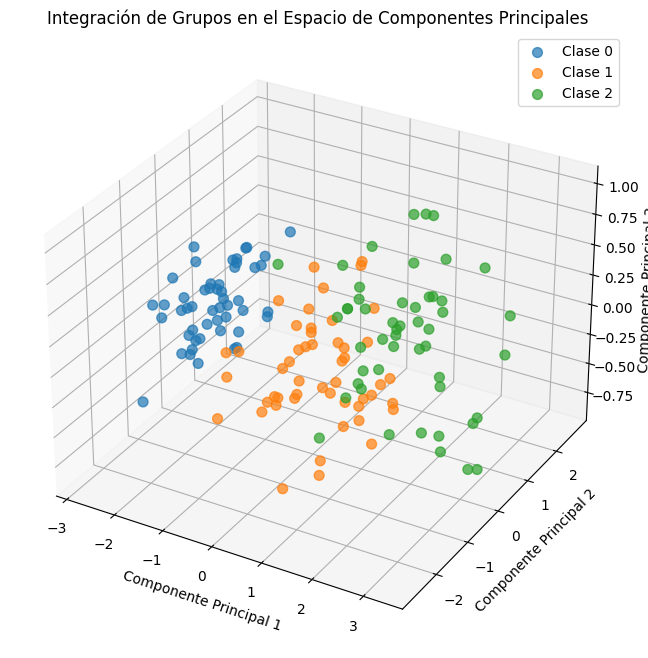

In [118]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for target in np.unique(y):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'PC1'],
               df.loc[indicesToKeep, 'PC2'],
               df.loc[indicesToKeep, 'PC3'],
               label=f'Clase {target}',
               s=50, alpha=0.7)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Integración de Grupos en el Espacio de Componentes Principales')
ax.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Viendo la composición en un mapa de calor

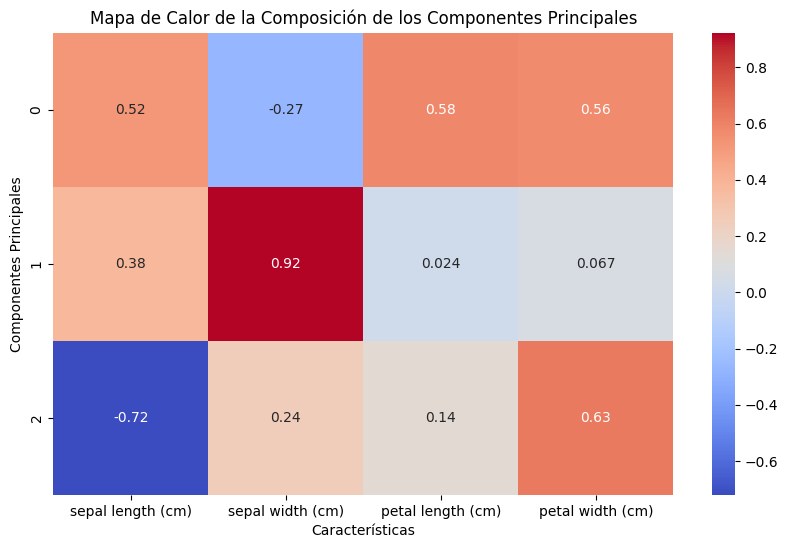

In [119]:
plt.figure(figsize=(10, 6))
sns.heatmap(component_df, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Composición de los Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()

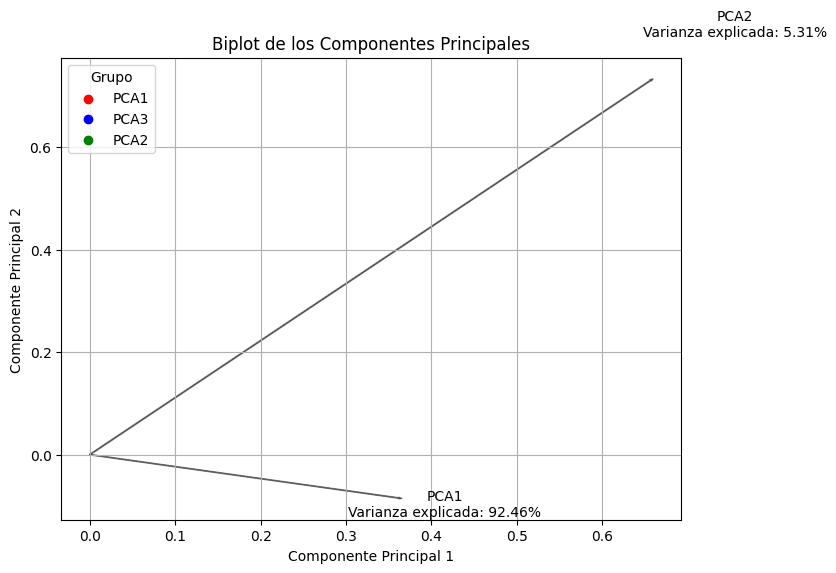

In [120]:
#Graficando con dos componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
for label in set(labels):
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color_dict[label], label=label)
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[i, 0], pca.components_[i, 1], color='black', alpha=0.5)
    plt.text(pca.components_[i, 0]*1.15, pca.components_[i, 1]*1.15, f'PCA{i+1}\nVarianza explicada: {explained_variance_ratio[i]*100:.2f}%', color='black', ha='center', va='center')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot de los Componentes Principales')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()


Viendo las observaciones de manera individual con biplot

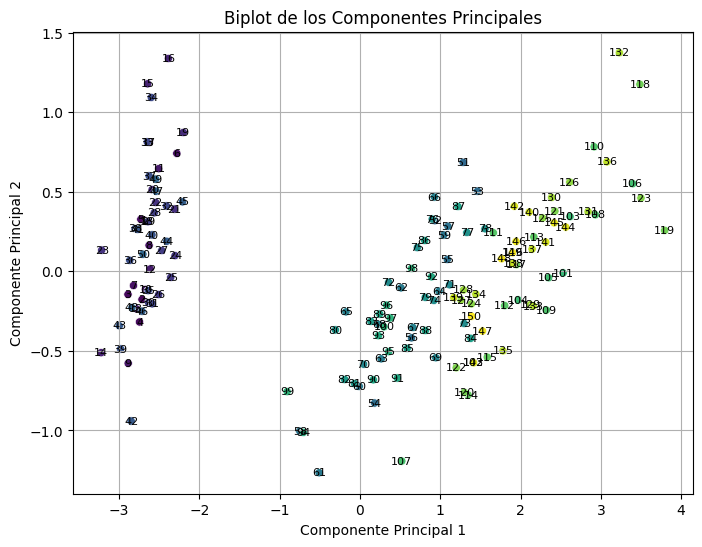

In [121]:
colors = sns.color_palette("viridis", len(X_pca))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=np.arange(1, len(X_pca) + 1), palette=colors, legend=False)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot de los Componentes Principales')

for i, txt in enumerate(np.arange(1, len(X_pca) + 1)):
    plt.text(X_pca[i, 0], X_pca[i, 1], txt, ha='center', va='center', fontsize=8)

plt.grid(True)
plt.show()